In [1]:
#TASK1
import pandas as pd

In [2]:
# TASK1
df = pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# TASK2
median_bp = df[df['Outcome'] == 1]['BloodPressure'].median()
print(f"Median Blood Pressure for Diabetics: {median_bp}")

Median Blood Pressure for Diabetics: 74.0


Outcome
0    500
1    268
Name: count, dtype: int64


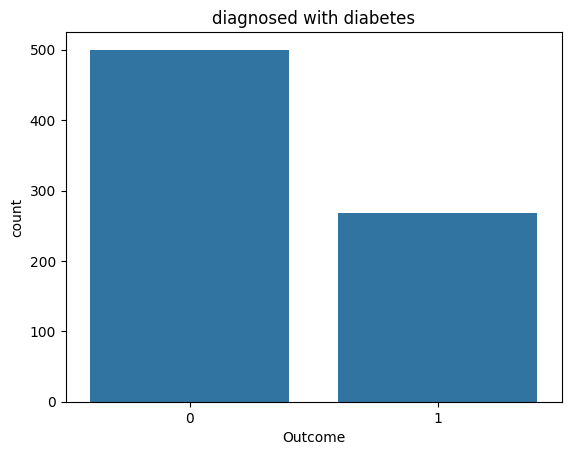

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# TASK3
print(df['Outcome'].value_counts())
sns.countplot(x='Outcome', data=df)
plt.title('diagnosed with diabetes')
plt.show()

In [6]:
# TASK4
X = df.drop('Outcome', axis=1)
y = df['Outcome']

TASK 5
train_test_split splits data into training and testing sets.
stratify=y ensures both sets have the same proportion of diabetics and non-diabetics as the original dataset.

In [7]:
#TASK 6
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [9]:
#TASK 7
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7447916666666666


In [10]:
#TASK 8
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Train Accuracy: 1.0
Test Accuracy: 0.7447916666666666


In [12]:
#TaSK 9
#Precision: Of all predicted diabetic cases, how many were correct?
#Recall: Of all actual diabetics, how many were correctly identified?

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.66      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



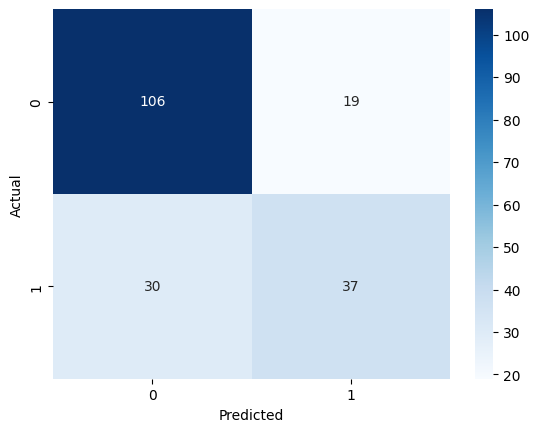

False Positive Rate: 0.15
Sensitivity: 0.55


In [13]:
#TASK 10
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

false_positive_rate = cm[0][1] / (cm[0][0] + cm[0][1])
print(f"False Positive Rate: {false_positive_rate:.2f}")

sensitivity = cm[1][1] / (cm[1][0] + cm[1][1])
print(f"Sensitivity: {sensitivity:.2f}")

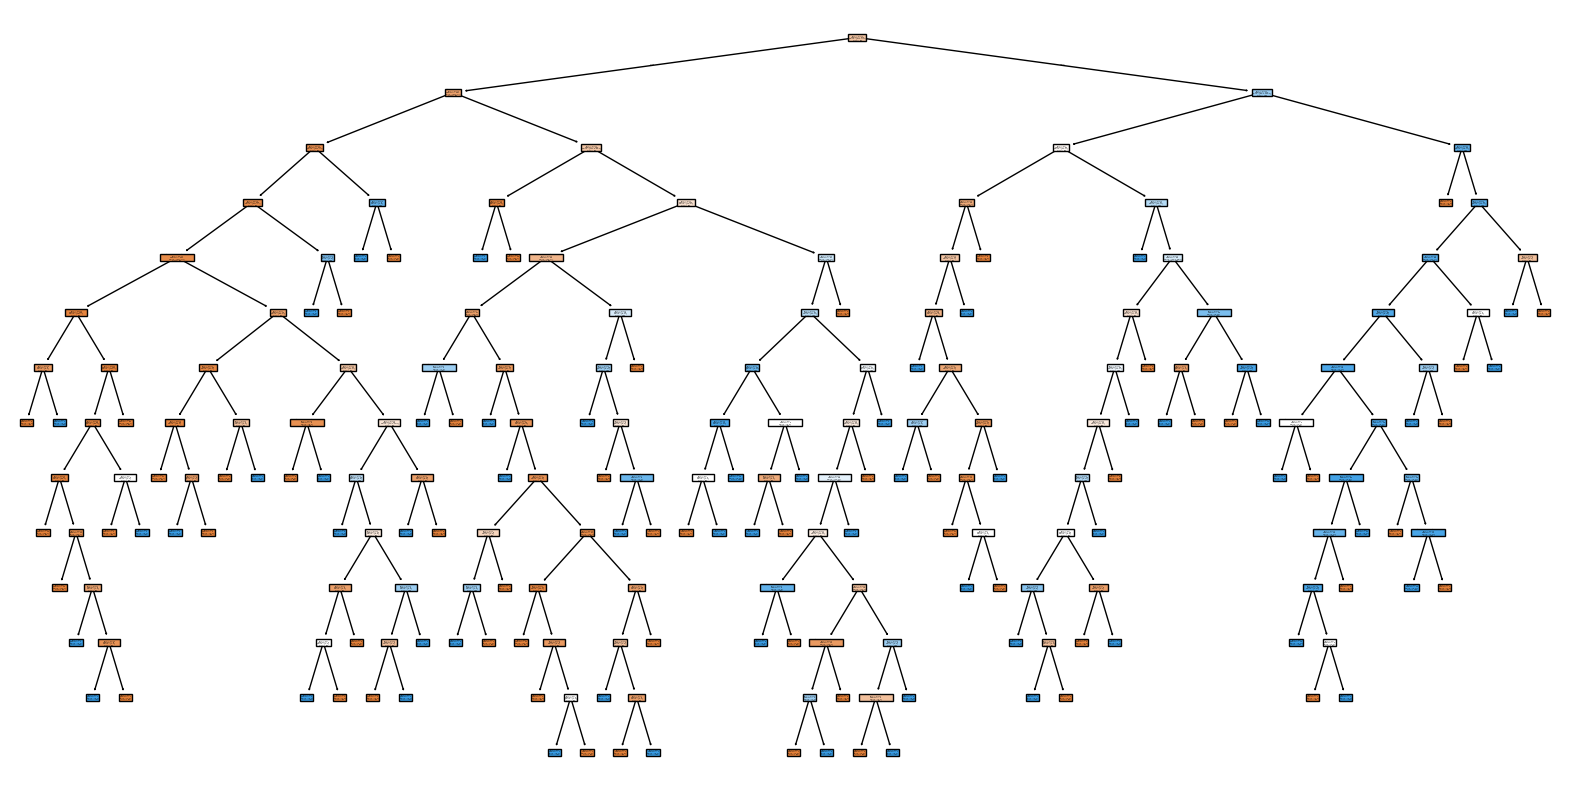

In [15]:
#TASK 11
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [16]:
#TASK 12
import pandas as pd

importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
importance = importance.sort_values('Importance', ascending=False)
print(importance)

                    Feature  Importance
1                   Glucose    0.339264
5                       BMI    0.168434
6  DiabetesPedigreeFunction    0.117931
7                       Age    0.115767
2             BloodPressure    0.097375
4                   Insulin    0.078565
0               Pregnancies    0.058974
3             SkinThickness    0.023690


In [17]:
#TASK 13
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_knn_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       125
           1       0.70      0.39      0.50        67

    accuracy                           0.73       192
   macro avg       0.72      0.65      0.66       192
weighted avg       0.72      0.73      0.70       192



In [18]:
#TASK 14
df_weather = pd.read_csv("pm25_2016_2020.csv")
print(df_weather.head())

   Unnamed: 0 date_local  latitude_x  longitude_x  elevation  tavg  tmin  \
0           0  6/15/2017   39.024265   -95.711275      280.0   NaN   NaN   
1           1  6/18/2017   39.024265   -95.711275      280.0   NaN   NaN   
2           2  6/21/2017   39.024265   -95.711275      280.0   NaN   NaN   
3           3  6/24/2017   39.024265   -95.711275      280.0   NaN   NaN   
4           4  6/30/2017   39.024265   -95.711275      280.0   NaN   NaN   

   tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun  arithmetic_mean_a  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                8.6   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                3.4   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                6.6   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                5.1   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                5.0   

   arithmetic_mean_b  
0                9.2  
1                3.9  
2                6.7  
3                5

In [21]:
#TASK 15
X = df_weather[['latitude_x', 'longitude_x']]
print(X.head())

   latitude_x  longitude_x
0   39.024265   -95.711275
1   39.024265   -95.711275
2   39.024265   -95.711275
3   39.024265   -95.711275
4   39.024265   -95.711275


TASK 16
KMeans clusters data into k groups based on similarity.
The new column "Cluster" will contain values 0, 1, 2, ..., k-1.

In [23]:
# TASK 17
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df_weather['Cluster'] = kmeans.fit_predict(X)

print(df_weather['Cluster'].value_counts())

Cluster
0    25672
2    24659
3    22089
1    16918
4    10662
Name: count, dtype: int64


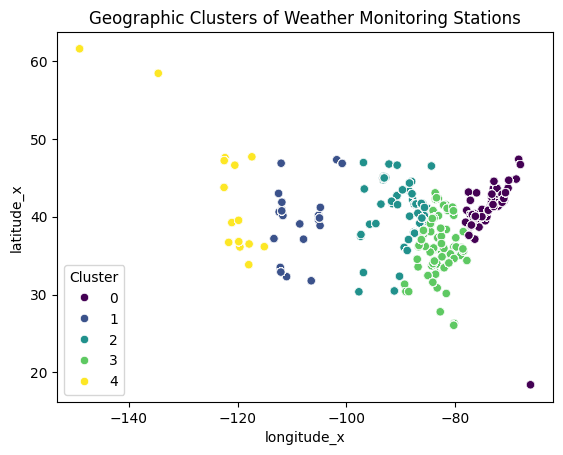

In [25]:
#TASK 18
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='longitude_x', y='latitude_x', hue='Cluster', data=df_weather, palette='viridis')

plt.title('Geographic Clusters of Weather Monitoring Stations')
plt.show()